# Lab 3 Feedforward Loops

> Yujia, Ethan, and Vincent adapted from materials developed by Diane and Elizabeth
> 
> 2024/4/4 (Week 3)

Edit this document directly. As you go through the notebooks you will find numbered questions. Please answer in the cells provided. 
   
This is an individual assignment, but you are allowed (encouraged!) to work together in groups and discuss coding and
answers. That said, you are responsible for all the material in this laboratory assignment. **DO NOT
COPY from anyone that you work with.** You are **NOT** allowed to share code. You need to write the code
and answer the questions yourself. Try the coding yourself first before seeking help.

<div class="alert alert-info" role="alert">
    
__Total Points 20__

__Due: 4/11 Thursday 1:30 pm__ -- by the start of your first lab session in week 4.
</div>

If you have any questions, please do not hesitate to ask. You can find the emails and office hours of your instructors and TAs on Canvas. Best of luck!

Feel free to go to the Quantitative Biosciences Center for help! 
[https://college.uchicago.edu/academics/quantitative-biosciences-center](https://college.uchicago.edu/academics/quantitative-biosciences-center) 
 


## Part 1 Transcriptional Cascade Continues

The transcriptional cascade, your old friend from the prelab, can be described by the diagram and set of ODEs below

<img src="https://github.com/dschnitkey/BIOS20236/blob/main/simple%20cascade.png?raw=true" alt= “” width="300px"/>

$$
\begin{align}
\frac{dX}{dt} &= S - \alpha_X X \tag{1}\\
\frac{dY}{dt} &= \beta \left(\frac{X^n}{K_X^n + X^n}\right) - \alpha_Y Y \tag{2}
\end{align}
$$

### Simulate an Abrupt Change

Up until now in computer labs the parameters are constant over time. When you define your right-hand-side function with a signature `rhs(x, t, param1, param2, ...)` you've never explicitly used `t` in your function body. 

Not anymore. In this section you'll learn how to use `t` in the RHS function to change a parameter depending on time! You will simulate a situation where a signal (in a biological context can be cAMP or absence of glucose) disappears abruptly. We say that the system is _turned off_ without this signal. We will explore how the system responds to the abrupt change in its parameter.

You can learn how to make a "jump" in the parameter from the following toy model. I will use `odeint` to solve $dX/dt = \beta$. $\beta$ starts to be 1 but jumps down to 0 at $t = 5$.

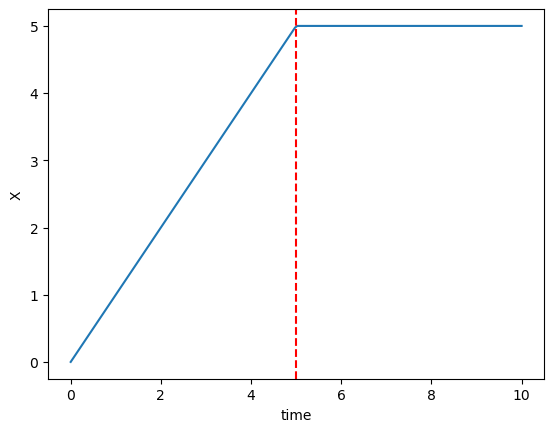

In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Define rhs
def rhs1(x, t, t_thresh, beta):
    if t < t_thresh:
        dxdt = beta
    else:
        dxdt = 0
    return dxdt

# Integration
beta = 1
t_thresh = 5

t_vec = np.linspace(0, 10, 200)

sol = odeint(rhs1, 0, t_vec, (t_thresh, beta))

# Plot
plt.plot(t_vec, sol, label="solution")
plt.xlabel("time")
plt.ylabel("X")
plt.axvline(x=5, color="red", linestyle="dashed")
plt.show()

<h3 style="color:blue;">Tasks for Part 1</h3>

__1.1 Turning on and off the transcriptional cascade.__
Simulate the transcriptional cascade with the ODEs given above.
You will use the set of parameters in the cell below.
The transcriptional cascade is on initially because $S = 1$.
Turn off the system by setting $S = 0$ at $t = 30$.
Integrate the system from $t = 0$ to 60 in steps of 0.05.
Both $X$ and $Y$ start from 0.
Plot the solution of $X$ and $Y$ in separate panels.

Keep in mind that in the solution provided by `odeint` each column is a different variable (e.g. 1st column is $X$ and 2nd column is $Y$) and each row is a different time point.

On both panels plot vertical dashed lines at $t = 0$ and 30 to mark the time when $X$ is turned on or off.

In [1]:
# Parameters
S = 1
a_x = .2
a_y = .2
beta = 1
K_x = 3
n = 6
t_thresh = 30

# your solution 1.1


__1.2 Changing the activation threshold.__
Repeat task 1.2 but with $K_X = 1$.

How does the lag of $Y$ change when turning on? What about the lag of $Y$ when turning off?

Overlay a dotted horizontal line $X = K_X$ on your $X(t)$ plot. Pay attention to the time when the trace $X(t)$ crosses $K_X$ either when $X$ is accumulating or decaying. Then answer why the lag of $Y$ is changed in such a way

In [2]:
# Parameters
S = 1
a_x = .2
a_y = .2
beta = 1
K_x = 1
n = 6
t_thresh = 30

# your solution 1.2


__Edit this cell to include your answer__

The lag of $Y$ when turning on is shortened but the lag of $Y$ when turning off is lengthened.

When the Hill function is sharp, $Y$ is turned on or off roughly at the time when $X(t)$ crosses $K_X$.
When $K_X$ decreases, the trace of $X$ crosses $K_X$ eariler when going up but crosses $K_X$ later when going down. That explains why $Y$ is turned on earlier but turned off later

## Part 2 Coherent Feedforward Loop (FFL) with an AND gate

The coherent FFL shown in the figure below is one of the motifs over-represented in the E. coli transcriptional network.
"Coherent" means that the two paths regulating the expression of $Z$ have the _same sign_.

In this section you'll learn how to model the FFL motifs mathematically.
We will then explore some of the useful dynamics of the coherent FFL with and AND gate, particularly
how it could act as a __persistence detector__.

<img src="https://github.com/dschnitkey/BIOS20236/blob/main/and%20gate.png?raw=true" alt= “” width="400"/>

### Mathematical construction of an AND gate

An AND gate has two inputs which are $X$ and $Y$ in this particular case.
__The output of an AND gate is true if and only if both inputs are true.__
To put it in the context of biology, if a gene is regulated by an "AND gate",
it is only expressed/activated if both of its upstream regulators have a high expression level/high activity.

We will use a combination of Hill functions to model the logic gates. Consider

$$
AND(X, Y) = \frac{X^n}{X^n + K_X^n}\frac{Y^n}{Y^n + K_Y^n}
$$

It makes sense because if either $X << K_X$ or $Y << K_Y$ the output of the function would be close to 0.
Only when both $X$ and $Y$ are high can the output be high.

In the coding task you will extend the transcriptional cascade model from Part 1 by adding an ODE for $Z$.
The production rate of $Z$, of course, will be regulated by an AND gate as discussed above

<h3 style="color:blue;">Tasks for Part 2</h3>

__2.1__ Write an RHS function for the coherenet FFL with an AND gate.

The equations governing $X$ and $Y$ are exactly the same as in the Part 1 transcriptional cascade model.
You will add a third equation to describe the derivative of $Z$.

The maximum production rate of $Z$, $\beta_Z$, will be scaled by an AND gate function.
This AND gate function will re-use the same parameter $n$ and $K_X$ as in the transcriptional cascade model.
Similar to $X$ and $Y$, $Z$ is also subject to 1st order degradation.
To summarize, to describe the derivative of $Z$, you will need three new constants, $\beta_Z$ as the maximum production rate constant,
$K_Y$ as a threshold for the activation from $Y$, and $\alpha_Z$ as a degradation rate constant.

Keep in mind that if your RHS function is defined like `rhs_ffl(u, t, param1, param2, ...)` and returns `dudt`,
both `u` and its derivative `dudt` should be of length three (X, Y and Z).

In [3]:
# your answer 2.1


__2.2__ Integrate the RHS of the coherent FFL model from $t=0$ to 60 in steps of 0.05.
The starting condition is $X$, $Y$ and $Z$ all being 0.
Remove the input signal $S$ (i.e. set it to 0) at time point 30.
The reaction constants are given in the cell.

Plot a trace of $X$, $Y$ and $Z$ against time in three different panels. In each panel,
plot two vertical dashed lines at $t = 0$ and $t = 30$ to mark the time when the system is turned on and off.

This task should remind you of task 1.2 - Ideally you should be able to reuse most of the code only changing the RHS function and the `args` that you'll feed to `odeint`

In [4]:
# Parameters
S = 1
a_x = .2
a_y = .2
a_z = .2
b_y = 1
b_z = 1
K_x = 3
K_y = 3
n = 6
t_thresh = 30

# your solution 2.2



__2.3 Compare the accumulation lag and the decay lag.__

The _accumulation lag_ of $Y$ or $Z$ is the time delay from when $X$ starts to express/activate to when $Y$ or $Z$ starts to express/activate.

Similarly, the _decay lag_ is the time delay from when $X$ starts to shut down to when $Y$ or $Z$ starts to shut down.

How is the accumulation lag different between $Y$ and $Z$? What about the decay lag? Answer this question _qualitatively_

__Edit this cell to include your answer__



### OR gate

The OR gate is given by

$$
OR(X, Y) = 1 - \frac{K_X^n}{X^n + K_X^n}\frac{K_Y^n}{Y^n + K_Y^n}
$$

__Formally, the output of an OR gate is true if either of the inputs is true.__
The above expression makes sense because the function only evaluates to a small value when both $X << K_X$ and $Y << K_Y$.
You may want to pause here and think about it.

__2.4 Coherent FFL with an OR gate__
Please define a new RHS function for the FFL with $Z$ regulated by an OR gate.
Then repeat task 2.2 (turning the system on and then off) with your new model. The parameters are provided for you

In [5]:
# Parameters
S = 1
a_x = .2
a_y = .2
a_z = .2
b_y = 1
b_z = 1
K_x = 2
K_y = 2
n = 6
t_thresh = 30

# your solution 2.4



__2.5__ Again, qualitatively compare the accumulation lag and the decay lag between $Y$ and $Z$ in the new model.

Is this behavior different from what you've answered in task 2.3? Explain why or why not

__Edit this cell to include your answer__



__2.6 Visualize AND and OR gates.__ To get some more intuition about how an AND or OR logic gate works, we will plot them as 3D surfaces.
We will plot the two inputs, $X$ and $Y$, along the width and length and the output $Z$ along the height.
As a visual guide we will color the surface according to its z-value.

Here is an example that shows an _AND gate_ with three different choices of the Hill coefficient $n$.
As you'd expect, the transition becomes steeper as $n$ increases similar to a single-input Hill function.

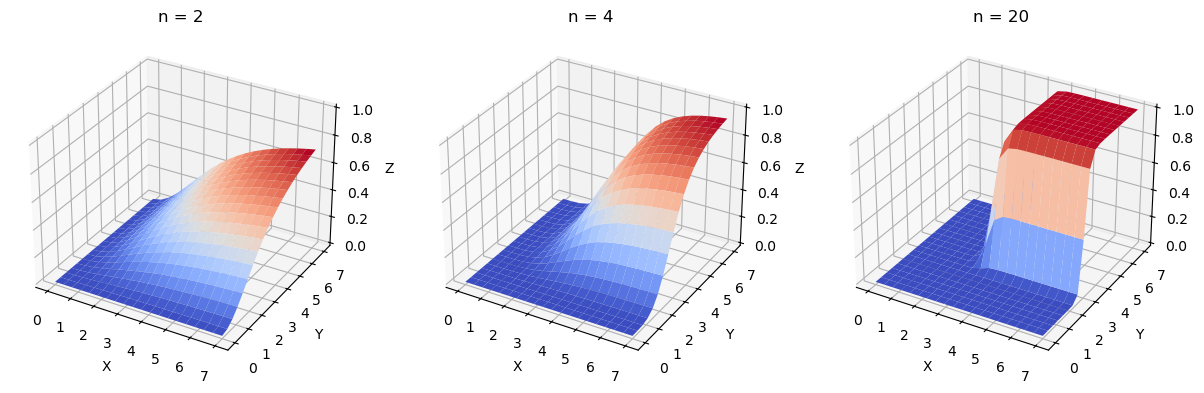

In [16]:
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np

def AND_Hill(x, y, Kx, Ky, n):
    return (x**n/(x**n + Kx**n))*(y**n/(y**n + Ky**n))

# parameters
K_x = 3
K_y = 3

# plot
x_vec = np.linspace(0, 7, 20)
y_vec = np.linspace(0, 7, 20)

X, Y = np.meshgrid(x_vec, y_vec)

p, ax = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize=(15, 6))

n_vec = [2, 4, 20]
for i in range(3):
    Z = AND_Hill(X, Y, K_x, K_y, n_vec[i])
    ax[i].plot_surface(X, Y, Z, cmap=cm.coolwarm)
    ax[i].set_xlabel("X")
    ax[i].set_ylabel("Y")
    ax[i].set_zlabel("Z")
    ax[i].set_title(f"n = {n_vec[i]}")
    ax[i].set_zlim(0, 1)

plt.show()

Note that $Z$ only takes a high value (shown as red) when __both $X$ and $Y$ are above their respective threshold__. This is exactly what we expect how an AND gate should behave.

Now, follow the example and plot an __OR gate__ as a 3D surface with __three different values of $K_X$__, $K_X = 1, 3, 4$. Keep the other two parameters unchanged,
$K_Y = 3$ and $n = 6$.
Inputs $X$ and $Y$ will range from 0 to 5.
Please color your surface according to its z-value. Label your $K_X$ values on your plot

In [6]:
# your solution 2.6



__2.7 Detecting signal persistence.__ Consider a coherent FFL with an AND gate (task 2.1 through 2.3).
What will happen if $X$ is only turned on _transiently_?

To simulate transient activation of $X$, turn off $S$ early at $t = 10$.
Integrate your system from $t = 0$ to 60 and plot $X$, $Y$ and $Z$ in three different panels similar to task 2.2.

To put things on the same scale, limit the y-axis for $X$, $Y$, and $Z$ between 0 and 5

In [7]:
# Parameters

S = 1
a_x = .2
a_y = .2
a_z = .2
b_y = 3
b_z = 1
K_x = 4
K_y = 4
n = 20
t_thresh = 10

# your solution 2.7



__2.8__ Overlay a horizontal dotted line on the plot of $X$ to indicate $K_X$.
Similarly, overlay a horizontal dotted line on the plot of $Y$ to indicate $K_Y$.
Unlike ealier tasks, you don't have to keep your vertical lines.

You should see both $X$ and $Y$ transiently shoot over their respective thresholds.
However, you should also see that $Z$ is off the entire time!
In other words, $Z$ does not respond to a transient signal

__Bonus point.__ Explain why this makes sense.

In [8]:
# your solution 2.8



__Edit cell to include your answer (bonus point)__



## Part 3 Incoherent FFL and a pulse generator

Pulsatile behaviors, e.g. activation potential of a neuron, are important in biology.
Here is a challenge: How to create a pulse when you don't have any pulsatile input?

Biology can use incoherent FFL together with an AND gate to create a pulse. See for yourself!

<img src="https://github.com/yuja-liu/bios20236_2024/blob/main/lab3/figs/ffl_inc_and.jpg?raw=true" alt="Incoherent FFL with and AND gate" width="400"/>

<h3 style="color:blue;">Task for Part 3</h3>

__3.1 A pulse generator.__ First, define an RHS function for an incoherent FFL with an AND gate.
To do that, simply modify one of your coherent FFL RHS, and make the production term of $Z$ proportional to

$$
AND_{incoherent}(X, Y) = \frac{X^n}{X^n + K_X^n}\frac{K_Y^n}{Y^n + K_Y^n}
$$

Here the AND gate is activated by $X$ but inhibited by $Y$. As a result, $Z$ is activated only if both $X$ is activated and $Y$ is inactivated. Pause for a minute and think about why the equation above makes sense

Integrate the system from $t = 0$ to 40 in steps of 0.05 and plot the solutions of $X$, $Y$, and $Z$. All three proteins start from 0. The parameters are given in the cell below

In [9]:
# Parameters
S = 1
a_x = .2
a_y = .2
a_z = .2
b_y = 1
b_z = 1
K_x = 3
K_y = 3
n = 6

# your solution 3.1



You should see that while both $X$ and $Y$ reaches their steady state monotonically,
$Z$ first shoots up and then decreases to a lower steady state.

Of course, there are other biological networks that can generate a single pulse (e.g. a very damped oscillator). You will see some examples later in this course!

Think about how the lag and the AND gate can shape the dynamics of $Z$. Try to convince yourself conceptually that the network can give a pulse of $Z$ (you don't have to write down any answer).

__3.2 A thinner pulse.__ Based on your solution to 3.1, try to change __only one parameter__ and create a narrower pulse of $Z$. You only have to show one solution if there are more than one ways to achieve this.

Please show which parameter you've changed and to what value. You can put it in your title/legend or simply print it out.

In [10]:
# your solution 3.2

